<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# to consider the float upto 2 decimals 
pd.options.display.float_format = '{:.2f}'.format

ModuleNotFoundError: No module named 'google.colab'

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the dataset
df_CO2Emission = pd.read_csv('CO2_emission_data.csv')
# display first five observations using head()
df_CO2Emission.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5652325082.00,0.01,3033659
1,Europe,4166,151,2172,7464446950.00,0.02,3014579
2,Europe,4254,151,2172,8376483740.00,0.06,2992724
3,Europe,3865,151,2068,9132562332.00,0.10,2968028
4,Europe,4056,151,2025,10701011856.00,0.15,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# we search for unique regions from the region column
df_CO2Emission.Region.unique()

array(['Europe', 'Africa', 'The Americas', 'Asia', 'Oceania',
       'Middle East'], dtype=object)

**Interpretation:** There are 6 regions in the given data. Now we plot the count of countries in each region.

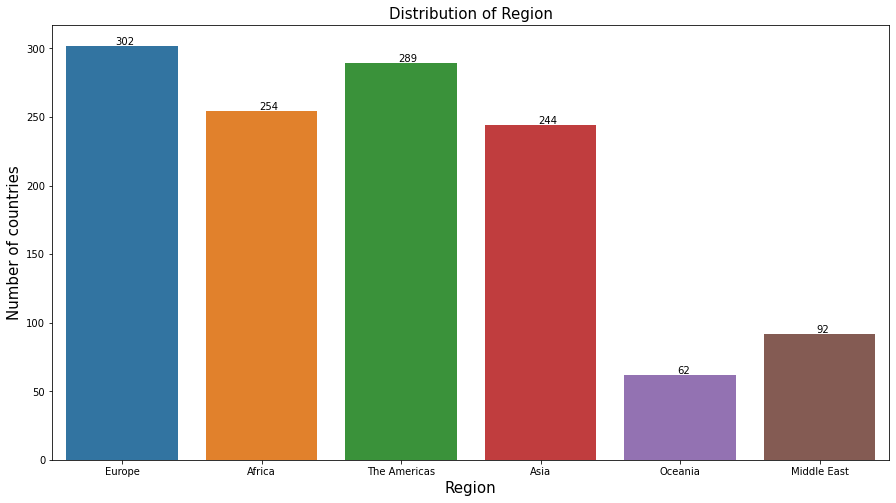

In [5]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# use a countplot to plot the number of countries for each region
sns.countplot(x = df_CO2Emission.Region)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_CO2Emission.Region.value_counts()[0] + 1, s = df_CO2Emission.Region.value_counts()[0])
plt.text(x = 1.98, y = df_CO2Emission.Region.value_counts()[1] + 1, s = df_CO2Emission.Region.value_counts()[1])
plt.text(x = 0.98, y = df_CO2Emission.Region.value_counts()[2] + 1, s = df_CO2Emission.Region.value_counts()[2])
plt.text(x = 2.98, y = df_CO2Emission.Region.value_counts()[3] + 1, s = df_CO2Emission.Region.value_counts()[3])
plt.text(x = 4.98, y = df_CO2Emission.Region.value_counts()[4] + 1, s = df_CO2Emission.Region.value_counts()[4])
plt.text(x = 3.98, y = df_CO2Emission.Region.value_counts()[5] + 1, s = df_CO2Emission.Region.value_counts()[5])

# set plot plot title
# set text size using 'fontsize'
plt.title('Distribution of Region', fontsize = 15)

# set axes labels
# set text size using 'fontsize'
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Number of countries', fontsize = 15)

# display the plot
plt.show()

**Interpretation:**  The maximum number of countries in the data belong to Europian region and the minimum number of countries in the data belong to Oceania.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# to check datatype of each variable
df_CO2Emission.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

**Interpretation:** All the variables except `Region` are numerical whereas 'Region' is a categorical variable.

In [7]:
# to check the dimension of data
df_CO2Emission.shape

(1243, 7)

**Interpretation:** There are 1243 observations and 7 variables in the data.

In [8]:
# the 'describe()' returns the statistical summary of data
df_CO2Emission.describe()

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1243.00,1243.00,1243.00,1243.00,1236.00,1243.00
mean,189766.62,88.28,75418.42,353554814174.66,0.33,45134936.48
std,769702.72,52.77,270758.65,1358969743285.45,1.63,160048304.35
min,48.00,1.00,30.00,123258507.00,0.00,69660.00
25%,3111.50,45.00,2721.00,7746580674.00,0.06,2097087.50
50%,16208.00,85.00,9318.00,24680372724.00,0.20,7739900.00
75%,75812.00,131.00,34956.50,177000000000.00,0.46,28846635.50
max,8286892.00,186.00,2727728.00,16200000000000.00,57.00,1350695000.00


**Interpretation:** The above summary returns some statistical insights about the data. 

i) The middle 50% of the CO2 emission data is between 3111 tonnes to 75812 tonnes. The standard deviation is 769702 tonnes which is much greater than the mean. This implies there is so much variation in the CO2 emission variable.

ii) The average GDP is near about 35000 crores where the maximum GDP is near about 16200 billions which indicates the developed countries in the corresponding region.  

iii) Maximum the energy usage is near about 27 lac units where maximum total population is 135 crores. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# consider the required variables only 
# pass the list of variables to the drop()
# 'axis = 1' drops the specified column
df_CO2Emission = df_CO2Emission.drop(['Region', 'Ease of Business', 'Internet Usage'], axis = 1)

# to print first five observations 
df_CO2Emission.head()

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5652325082.00,3033659
1,4166,2172,7464446950.00,3014579
2,4254,2172,8376483740.00,2992724
3,3865,2068,9132562332.00,2968028
4,4056,2025,10701011856.00,2940880


**Interpretation:**  The above output shows that we have dropped the variables 'Region', 'Ease of Business', 'Internet Usage'. Now we have 4 variables in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# to check for null values and sum them column-wise
total_missings = df_CO2Emission.isnull().sum()
total_missings

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

**Interpretation:**  There are no missing values in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

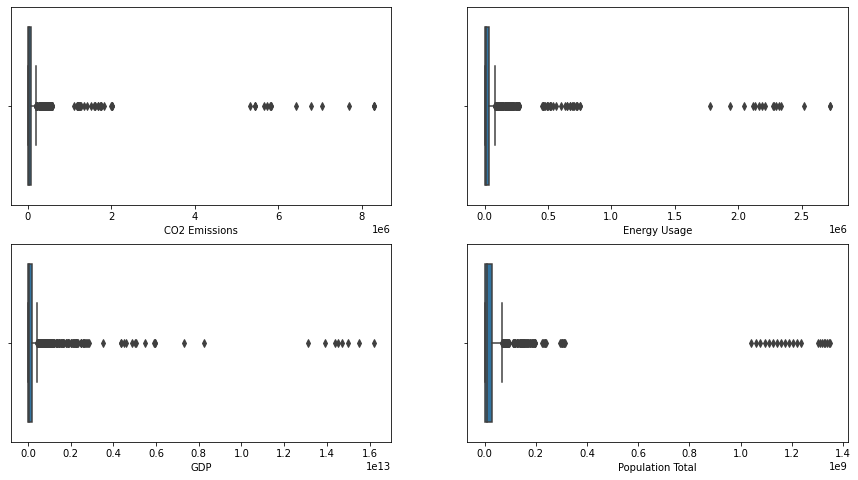

In [11]:
# plot the boxplot for each variable 

# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_CO2Emission.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_CO2Emission[variable], ax = subplot)

# display the plot
plt.show()

**Interpretation:** From the above boxplots, we can see that there are so many outliers present in all the variables. We need to remove them before the further analysis.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Generally, we use the 1.5IQR method to remove the outliers. Here, there are some extreme outliers that we need to remove. Thus, we use condition as 3.5IQR.

In [12]:
# calculate the first quartile
Q1 = df_CO2Emission.quantile(0.25)

# calculate the third quartile
Q3 = df_CO2Emission.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-3.5*IQR, Q3+3.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_CO2Emission = df_CO2Emission[~((df_CO2Emission < (Q1 - 3.5 * IQR)) | (df_CO2Emission > (Q3 + 3.5 * IQR))).any(axis=1)]

# check the shape of the data 
df_CO2Emission.shape

(1054, 4)

**Interpretation:**  From the dimension of the data, we can see that there are 1054 observations and 4 variables in the data. We have removed the extreme outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

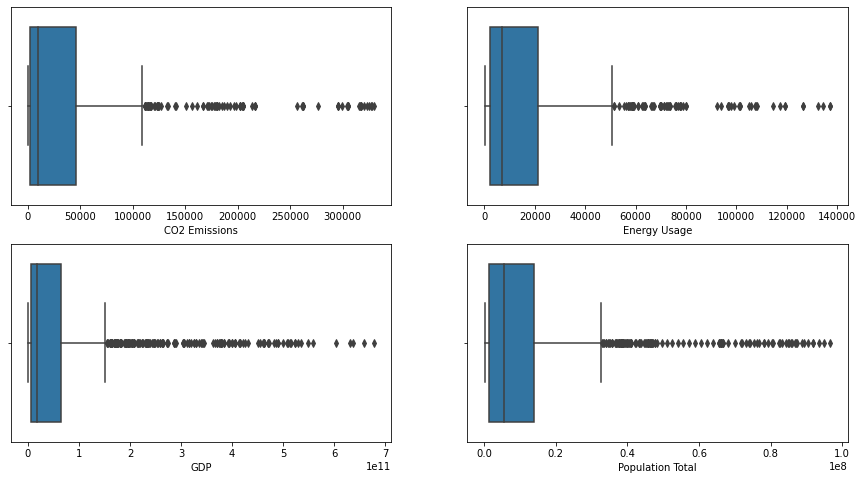

In [13]:
# plot the boxplot for each variables

# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_CO2Emission.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_CO2Emission[variable], ax = subplot)

# display the plot
plt.show()

**Interpretation:**  

i) Observing the range of the boxplot, we can say that the extreme outliers are removed from the original data.

ii) The new 'outliers' that we can see in the variables are moderate outliers that lied within the min/max range before removing the actual outliers.

Now the data is ready for hierarchical clustering.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# select the variables for model building and store it in 'features'
features = df_CO2Emission[['CO2 Emissions','Energy Usage','GDP','Population Total']]

# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
features_scaled = scaler.fit_transform(features)

In [15]:
# convert the array back to a dataframe
# pass the required column names to the parameter 'columns'
df_scaled = pd.DataFrame(features_scaled, columns = df_CO2Emission.columns)

# summarize the dataframe
# use 'round()' to consider the integer values
round(df_scaled.describe())

,CO2 Emissions,Energy Usage,GDP,Population Total
count,1054.00,1054.00,1054.00,1054.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,-1.00,-1.00
50%,-0.00,-0.00,-0.00,-0.00
75%,0.00,0.00,-0.00,0.00
max,5.00,5.00,5.00,5.00


**Interpretation:** Here all the variables have a mean 0 and standard deviation of 1. Now they are in the standard form. 

<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[:10])

[[380.         382.           0.00002257   2.        ]
 [391.         392.           0.00003782   2.        ]
 [381.         383.           0.0000863    2.        ]
 [ 36.          37.           0.00008787   2.        ]
 [ 26.          27.           0.00010737   2.        ]
 [495.         496.           0.00011967   2.        ]
 [384.         385.           0.00012006   2.        ]
 [816.         818.           0.00014106   2.        ]
 [960.         961.           0.00014553   2.        ]
 [389.         390.           0.00014886   2.        ]]


**Interpretation:** 

i) The 1st column and the 2nd column represent observations that are merged together. The distance at which the observations are merged is given in the 3rd column which is used to plot the dendrogram. The 4th column in the linkage matrix is the number of observations in the merged cluster.

ii) Here at the ith iteration, the observations `link_mat[i,0]` and `link_mat[i,1]` are considered to form a cluster n+i (n+i is the index of cluster obtained at ith iteration). A cluster with an index less than n corresponds to one of the original observations. 

iii) Consider the 3rd row in the linkage matrix, here the 1st observation is 381.0 (in the 1st column) and the 2nd observation is 383.0 (in the 2nd column). We merge these two observations to form a cluster and get the linkage distance as 0.000086 (in the 3rd column). Now, there are two obsevations in this newly formed cluster (which is given in the 4th column).

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
#other distance options like manhattan and cosine can go well with single,complete & avg
agc.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [18]:
pd.DataFrame(agc.labels_)[0].value_counts()

1    820
0    178
2     56
Name: 0, dtype: int64

In [19]:
silhouette_score(df_scaled,agc.labels_)

0.6235615537481752

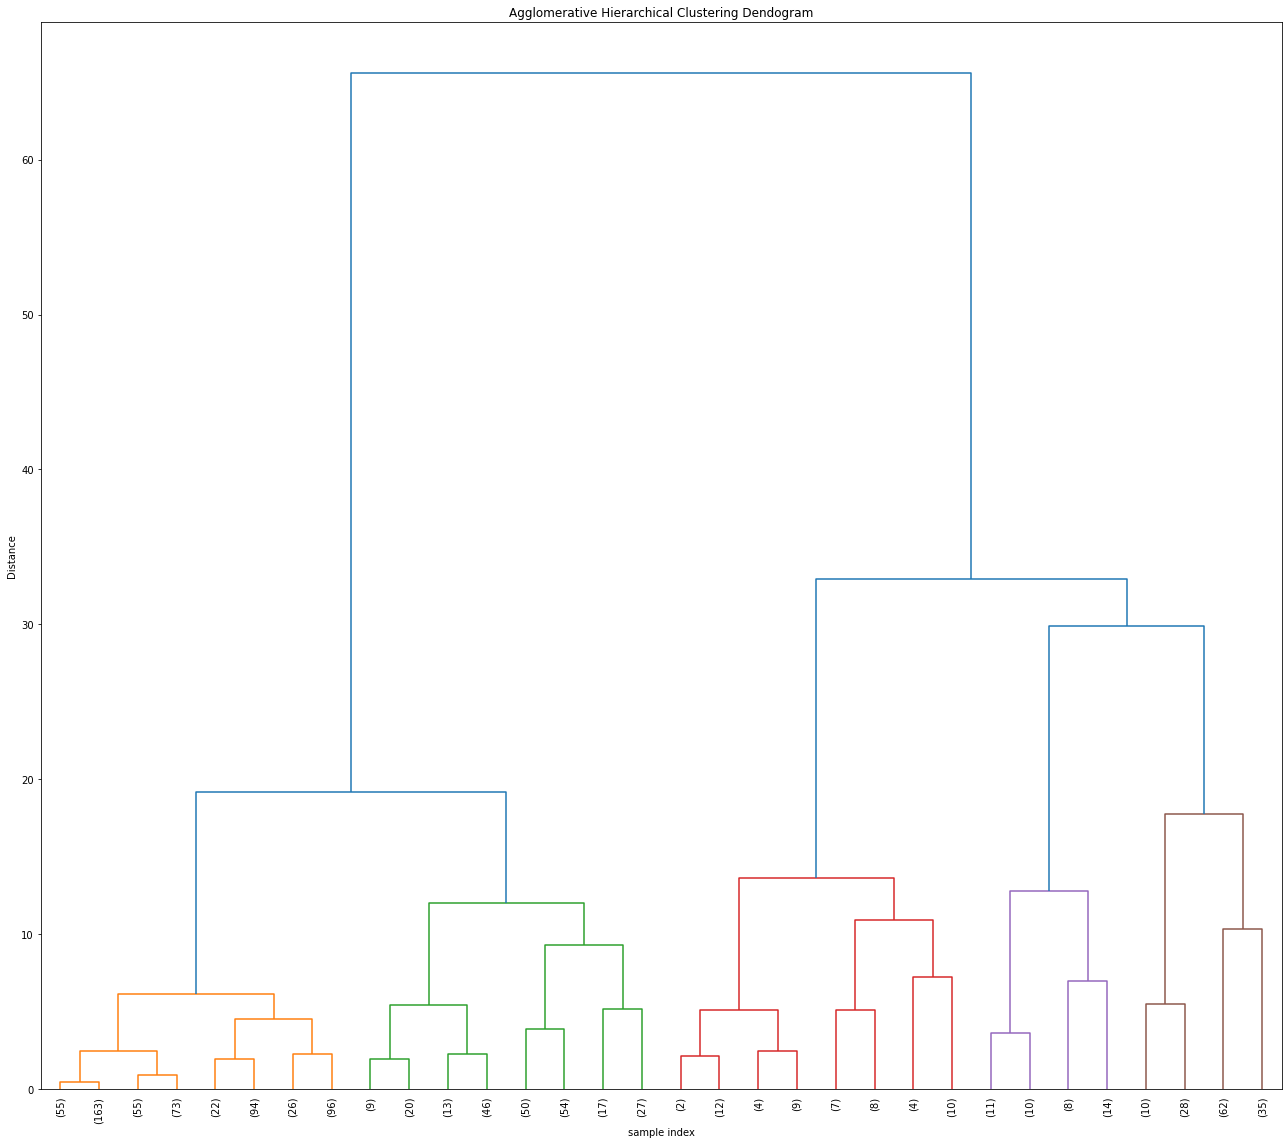

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
#Z = linkage(X_std_df,method='average',metric='cityblock')
Z = linkage(df_scaled,method='ward',metric='euclidean')
dendrogram(Z,leaf_font_size=10,leaf_rotation=90.0,truncate_mode='level',p=4,color_threshold=18)
plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation 
#between the distance of points in feature space and 
#distance on dendrogram
# closer it is to 1, the better is the clustering
#min or single | max or complete | 
Z = linkage(df_scaled, 'ward')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(df_scaled))
c

0.7973822617121826

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# agglomerative clustering recursively merges the pair of clusters that minimally increases a given linkage distance.
# instantiate clustering method with 2 clusters and 'ward' linkage method
# ‘ward’ method of linkage minimizes the variance of the clusters that are being merged
agc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

# fit the model on the scaled data
agc.fit(features_scaled)

AgglomerativeClustering(n_clusters=3)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df_scaled['labels']=agc.labels_
df_scaled.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
0,-0.52,-0.62,-0.55,-0.52,1
1,-0.53,-0.61,-0.53,-0.52,1
2,-0.52,-0.61,-0.52,-0.53,1
3,-0.53,-0.61,-0.52,-0.53,1
4,-0.53,-0.61,-0.50,-0.53,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# check the size of each cluster
df_scaled['labels'].value_counts()

1    820
0    178
2     56
Name: labels, dtype: int64

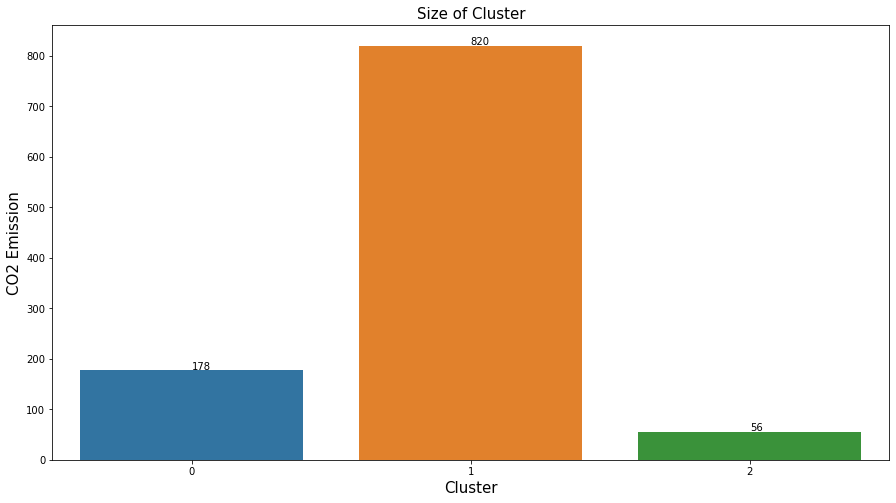

In [25]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# plot the countplot for the cluster size
sns.countplot(data = df_scaled, x = 'labels')

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0, y = df_scaled['labels'].value_counts()[0] + 1, s = df_scaled['labels'].value_counts()[0])
plt.text(x = 1, y = df_scaled['labels'].value_counts()[1] + 1, s = df_scaled['labels'].value_counts()[1])
plt.text(x = 2, y = df_scaled['labels'].value_counts()[2] + 1, s = df_scaled['labels'].value_counts()[2])

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('CO2 Emission', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The maximum number of observations is in the 2nd cluster.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

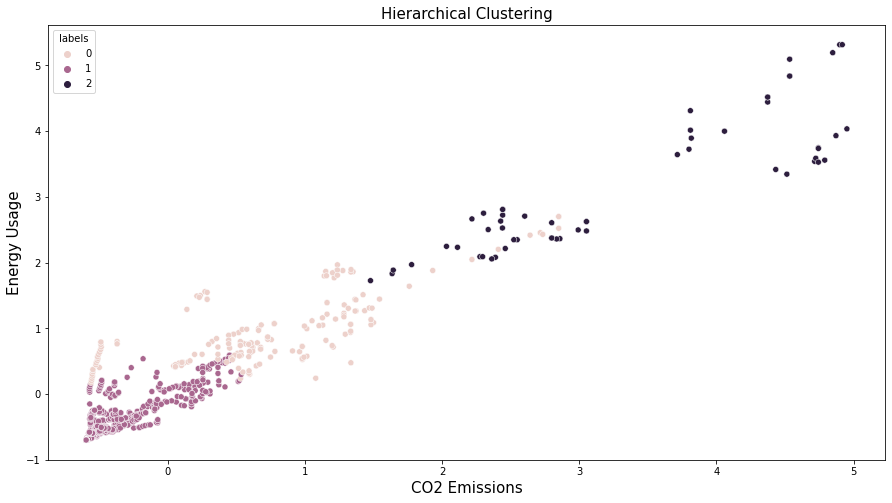

In [26]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# plot the scatterplot to visualize the clusters
# pass the hue parameter to assign different colors to observatiosn in each cluster
sns.scatterplot(x = 'CO2 Emissions', y = 'Energy Usage', data = df_scaled, hue = 'labels')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('CO2 Emissions', fontsize = 15)
plt.ylabel('Energy Usage', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
df0=df_scaled[df_scaled['labels']==0]
df0.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
8,0.96,0.64,-0.02,1.11,0
9,0.91,0.66,0.13,1.13,0
10,1.21,0.71,0.28,1.16,0
11,1.15,0.82,0.40,1.19,0
12,1.29,0.91,0.55,1.22,0


In [28]:
df0.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
count,178.00,178.00,178.00,178.00,178.00
mean,0.71,0.95,1.22,0.97,0.00
std,0.73,0.54,1.27,1.61,0.00
min,-0.56,0.17,-0.53,-0.61,0.00
25%,0.29,0.57,0.31,-0.25,0.00
50%,0.62,0.77,1.03,0.06,0.00
75%,1.21,1.22,1.86,1.87,0.00
max,2.85,2.70,4.99,4.58,0.00


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
df1=df_scaled[df_scaled['labels']==1]
df1.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
0,-0.52,-0.62,-0.55,-0.52,1
1,-0.53,-0.61,-0.53,-0.52,1
2,-0.52,-0.61,-0.52,-0.53,1
3,-0.53,-0.61,-0.52,-0.53,1
4,-0.53,-0.61,-0.50,-0.53,1


In [30]:
df1.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
count,820.00,820.00,820.00,820.00,820.00
mean,-0.38,-0.42,-0.40,-0.31,1.00
std,0.27,0.30,0.28,0.50,0.00
min,-0.60,-0.70,-0.59,-0.68,1.00
25%,-0.57,-0.67,-0.57,-0.65,1.00
50%,-0.50,-0.53,-0.50,-0.49,1.00
75%,-0.28,-0.30,-0.37,-0.18,1.00
max,0.54,0.59,1.13,2.17,1.00


**Interpretation:** The above output shows the first ten observations belonging to the 2nd cluster.

In [31]:

df2=df_scaled[df_scaled['labels']==2]
df2.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
39,1.78,1.97,2.32,1.32,2
40,1.64,1.83,2.16,1.34,2
41,1.48,1.72,0.46,1.36,2
42,1.64,1.89,0.74,1.38,2
43,2.03,2.25,0.96,1.40,2


In [32]:
df2.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
count,56.00,56.00,56.00,56.00,56.00
mean,3.34,3.17,2.02,1.44,2.00
std,1.10,1.01,1.19,0.74,0.00
min,1.48,1.72,0.32,0.20,2.00
25%,2.44,2.36,0.96,0.86,2.00
50%,3.02,2.74,1.99,1.39,2.00
75%,4.52,3.90,2.66,1.80,2.00
max,4.95,5.32,5.15,2.95,2.00


In [33]:
C0=np.array(df0.mean()[:-1])
C1=np.array(df1.mean()[:-1])
C2=np.array(df2.mean()[:-1])
centroids=pd.DataFrame([C0,C1,C2],columns=['CO2 Emissions', 'Energy Usage', 'GDP', 'Population Total'])
centroids

,CO2 Emissions,Energy Usage,GDP,Population Total
0,0.71,0.95,1.22,0.97
1,-0.38,-0.42,-0.40,-0.31
2,3.34,3.17,2.02,1.44


In [34]:
df0.shape[0]

178

In [35]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-C0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-C1)**2)
for i in np.arange(df2.shape[0]):
  I2=I2+np.sum((df2.iloc[i,:-1]-C2)**2)
tot_inertia=I0+I1+I2
print(I0)
print(I1)
print(I2)
print('Total inertia',tot_inertia)

890.1021350268833
402.986447755747
230.90438639777545
Total inertia 1523.9929691804057


<a id="DBSCAN"></a>
## 3. DBSCAN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Perform DBSCAN for the data given using 0.7 as epsilon and 9 minimum samples. Display the unique number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# instantiate DBSCAN with epsilon and minimum points 
# pass the epsilon radius for neighbourhood
# pass the number of minimum points
model = DBSCAN(eps = 0.7, min_samples = 10)

# fit the model on the scaled data
model.fit(features_scaled)

DBSCAN(eps=0.7, min_samples=10)

In [75]:
features_scaled

array([[-0.52368216, -0.61512234, -0.54674711, -0.52290028],
       [-0.52583644, -0.60653561, -0.53138568, -0.52393969],
       [-0.52435537, -0.60653561, -0.52365431, -0.52513027],
       ...,
       [-0.56811415, -0.37754165, -0.49682501, -0.02847479],
       [-0.56489956, -0.36693967, -0.47055152, -0.00957655],
       [-0.55966534, -0.3581339 , -0.48611335,  0.01049822]])

In [76]:
# display the unique clusters formed by DBSCAN
pd.DataFrame(model.labels_)[0].value_counts()

 0    953
-1    101
Name: 0, dtype: int64

**Interpretation:** The DBSCAN algorithm forms 2 clusters where 0 and 1 are the cluster labels and the outliers are represented by -1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check for the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# check the labels of each cluster
df_CO2Emission['Cluster_DBSCAN'] = model.labels_

# to count the values in each cluster
df_CO2Emission['Cluster_DBSCAN'].value_counts()

 0    953
-1    101
Name: Cluster_DBSCAN, dtype: int64

**Interpretation:** The maximum number of observations is in the 1st cluster.

KeyError: 1

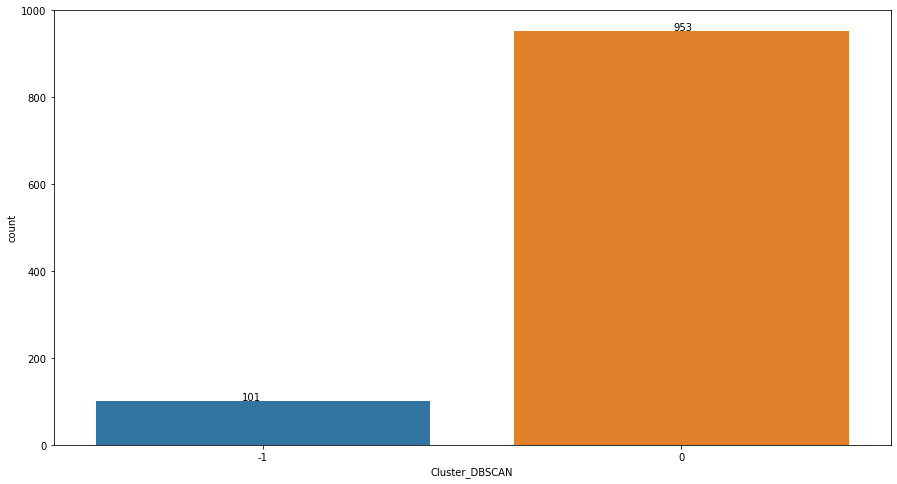

In [78]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# plot the countplot for the cluster size
sns.countplot(data = df_CO2Emission, x = 'Cluster_DBSCAN')

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.98, y = df_CO2Emission['Cluster_DBSCAN'].value_counts()[0] + 1, 
         s = df_CO2Emission['Cluster_DBSCAN'].value_counts()[0])

plt.text(x = -0.05, y = df_CO2Emission['Cluster_DBSCAN'].value_counts()[-1] + 1, 
         s = df_CO2Emission['Cluster_DBSCAN'].value_counts()[-1])

plt.text(x = 1.98, y = df_CO2Emission['Cluster_DBSCAN'].value_counts()[1] + 1, 
         s = df_CO2Emission['Cluster_DBSCAN'].value_counts()[1])


# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('CO2 Emission', fontsize = 15)

# display the plot
plt.show()


**Interpretation:**  The maximum number of observations are in the 1st cluster and there are 92 outliers in the cluster formed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Describe the outliers identified by the DBSCAN algorithm in the previous question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
df_scaled['DB_labels']=model.labels_

In [ ]:
outliers=df_scaled[df_scaled['DB_labels']==-1]
outliers.describe()

In [ ]:
# in the DBSCAN algorithm cluster label '-1' represents the outliers
outliers = df_CO2Emission[df_CO2Emission.Cluster_DBSCAN == -1]

# check the count of outliers
outliers.index.value_counts().sum()

In [ ]:
# to get statistical summary of outliers
outliers.describe()

**Interpretation:**

i) From the above output we get the total number of outliers. There are 92 outliers in the data which are identified by DBSCAN.
 
ii) These observations may represent the countries with extreme energy usage or GDP that contribute the most in CO2 emission. 

In [ ]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# plot the scatterplot to visualize the clusters
# pass the hue parameter to assign different colors to observatiosn in each cluster
sns.scatterplot(x = 'CO2 Emissions', y = 'Energy Usage', data = df_scaled, hue = 'DB_labels')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('DBScan Clustering', fontsize = 15)
plt.xlabel('CO2 Emissions', fontsize = 15)
plt.ylabel('Energy Usage', fontsize = 15)

# display the plot
plt.show()